In [ ]:
import os
import sys
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import preprocessing,metrics
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, validation_curve
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.tree import plot_tree

In [ ]:
final_df = pd.read_csv("f1_2 (2).csv")

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
final_df = final_df.iloc[:,3:19]

In [ ]:
X = final_df.drop('milliseconds',axis=1)
y = final_df['milliseconds']

In [ ]:
X = X.apply(pd.to_numeric)

In [ ]:
y = y.astype('int')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
# Define the parameter
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)


In [ ]:
# model creation
Random_Classifier = RandomForestClassifier()  

In [ ]:
# Grid search for hyperparameter
gridF = GridSearchCV(Random_Classifier, hyperF, cv = 3, verbose = 1)

In [ ]:
# fitting the model
gridF.fit(X_train,y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed: 39.9min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [ ]:
gridF.best_params_

{'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [ ]:
# Model with optimal hyperparameter
Random_classify_optim = RandomForestClassifier(n_estimators=100,min_samples_leaf=1,min_samples_split=2,max_depth=25)

In [ ]:
# fitting the model
Random_classify_optim.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
feat_labels = X_train.columns
out_label = final_df.columns

In [ ]:
feature_importance= sorted(zip(Random_classify_optim.feature_importances_, feat_labels), reverse=True)

#create two lists from the previous list of tuples
df = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df['importance'])
feature= list(df['feature'])

In [ ]:
df.head()

,importance,feature
0,0.220582,time
1,0.164913,lap
2,0.089265,stop
3,0.087944,laps
4,0.076984,points_y


In [ ]:
# Use the forest's predict method on the test data
y_pred = gridF.predict(X_test)

In [ ]:
# accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9814814814814815


In [ ]:
no_obdervation = range(1,(len(y_test)+1))

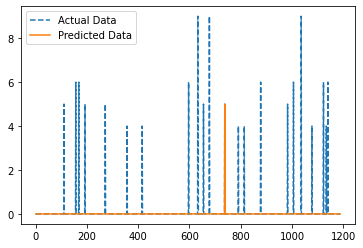

In [ ]:
plt.plot(no_obdervation, y_test, label = "Actual Data",linestyle="--")
plt.plot(no_obdervation, y_pred, label = "Predicted Data")
plt.legend()
plt.show()

In [ ]:
param_range= n_estimators
train_scores, test_scores = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train, 
                                param_name = 'n_estimators', 
                                param_range = param_range,cv = 3)

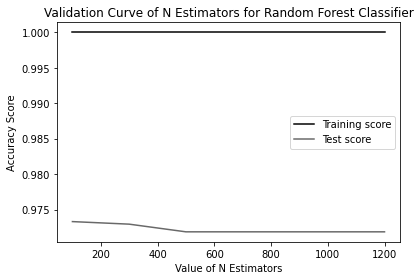

In [ ]:
#Calculate mean and standard deviation for training set
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

#Calculate mean and standard deviation for testing set
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Plot mean accuracy scores for training and testing sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Test score", color="dimgrey")

#Create plot
plt.title("Validation Curve of N Estimators for Random Forest Classifier")
plt.xlabel("Value of N Estimators")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [ ]:
#Plotting the validation curve of training and testing scores for min_samples_split
param_range= max_depth
train_scores, test_scores = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train, 
                                param_name = 'max_depth', 
                                param_range = param_range,cv = 3)

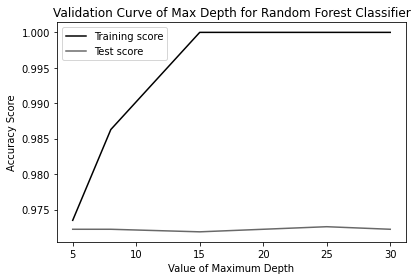

In [ ]:
#Calculate mean and standard deviation for training set
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

#Calculate mean and standard deviation for testing set
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Plot mean accuracy scores for training and testing sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Test score", color="dimgrey")

#Create plot
plt.title("Validation Curve of Max Depth for Random Forest Classifier")
plt.xlabel("Value of Maximum Depth")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()


In [ ]:
param_range= min_samples_split
train_scores, test_scores = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train, 
                                param_name = 'min_samples_split', 
                                param_range = param_range,cv = 3)

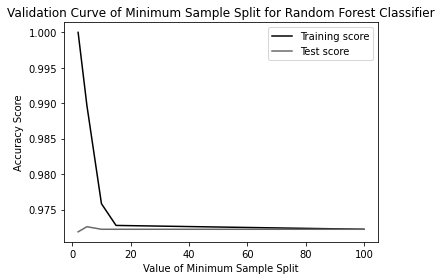

In [ ]:
#Calculate mean and standard deviation for training set
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

#Calculate mean and standard deviation for testing set
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Plot mean accuracy scores for training and testing sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Test score", color="dimgrey")

#Create plot
plt.title("Validation Curve of Minimum Sample Split for Random Forest Classifier")
plt.xlabel("Value of Minimum Sample Split")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [ ]:
param_range= min_samples_leaf
train_scores, test_scores = validation_curve(
                                RandomForestClassifier(),
                                X = X_train, y = y_train, 
                                param_name = 'min_samples_leaf', 
                                param_range = param_range,cv = 3)

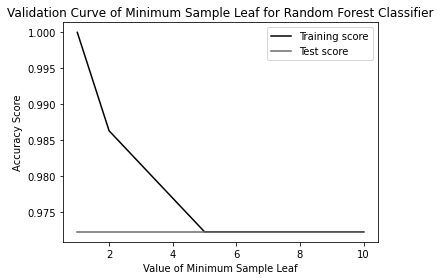

In [ ]:
#Calculate mean and standard deviation for training set
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

#Calculate mean and standard deviation for testing set
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#Plot mean accuracy scores for training and testing sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Test score", color="dimgrey")


#Create plot
plt.title("Validation Curve of Minimum Sample Leaf for Random Forest Classifier")
plt.xlabel("Value of Minimum Sample Leaf")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [ ]:
estimator = Random_classify_optim.estimators_[5]

In [ ]:
import matplotlib.pyplot as plt
import graphviz
from sklearn.tree import export_graphviz

In [ ]:
dot_data = export_graphviz(estimator, 
          feature_names=feat_labels,
          class_names=out_label[15], 
          filled=True, impurity=True, 
          rounded=True)

graph = graphviz.Source(dot_data, format='png')

In [ ]:
graph.save('rf_individual.png')

'rf_individual.png'

In [ ]:
graph.render('figure_name')

'figure_name.png'

In [ ]:
pylab.savefig('foo.png')

NameError: ignored